<h1 style="color: red;">III- Clustering and Manifold Learning</h1>

<h2 style="color: green;">1-Import Python Modules and Dataset </h2>

In [115]:
    # Import necessary libraries
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.cluster import KMeans
    from sklearn.manifold import TSNE, MDS
    from sklearn.metrics import silhouette_score
    from sklearn.preprocessing import StandardScaler
    
    
    # Load the preprocessed dataset
    df = pd.read_csv('bank_prepared_dataset.csv')
    
    # Display the first few rows of the dataset
    df.head()

,age,education,default,balance,housing,loan,campaign,previous,job_blue-collar,job_entrepreneur,...,job_services,job_student,job_technician,job_unemployed,job_nan,marital_married,marital_single,marital_nan,contact_telephone,contact_nan
0,-0.333333,3,0,-0.186721,1,0,1.0,0.000000,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0.055556,2,0,0.121845,1,1,1.0,-0.584963,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1.166667,2,0,0.346018,1,1,1.0,-0.584963,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.500000,2,0,-0.178394,1,1,0.0,0.000000,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0.888889,2,0,0.329321,1,0,0.0,-0.584963,0,0,...,0,0,0,0,0,1,0,0,0,0


<h2 style="color: green;">2-Scatterplot Function (to be used below for visualising a clustering) </h2>

In [117]:
# 2- Scatterplot Function (to visualize clustering)
def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette='Set1', s=50, alpha=0.7)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend(title='Cluster')
    plt.show()


In [7]:
# !pip install yellowbrick

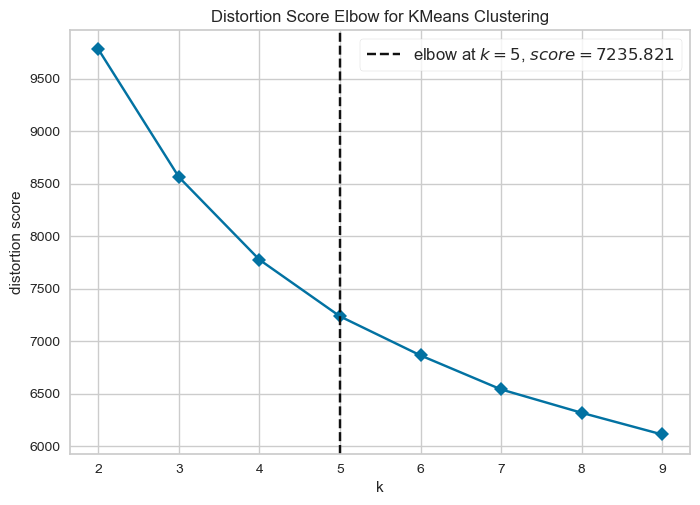

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [119]:
from yellowbrick.cluster import KElbowVisualizer
# Determine the optimal number of clusters using the elbow method
model = KMeans(n_init=10)
elbow_visualizer = KElbowVisualizer(model, k=(2, 10), metric='distortion', timings=False)
elbow_visualizer.fit(df)
elbow_visualizer.show()


## Interpretation of the Elbow Method

The plot above represents the **Elbow Method** used to determine the optimal number of clusters for K-Means clustering. The x-axis represents the number of clusters (k), while the y-axis represents the **distortion score**, which measures the sum of squared distances from each point to its assigned cluster center.

### Key Observations:
- The distortion score decreases as the number of clusters increases, which is expected since adding more clusters reduces the intra-cluster variance.
- The **"elbow point"** is observed at **k = 5**, where the rate of decrease in distortion score slows down significantly.
- Beyond **k = 5**, adding more clusters results in only minor improvements, indicating diminishing returns.

### Conclusion:
Based on the **Elbow Method**, the optimal number of clusters for this dataset is **5**. This means that segmenting the data into 5 clusters is likely to provide a good balance between minimizing intra-cluster variance and avoiding excessive complexity.


In [34]:
# choding k 
from sklearn.metrics import silhouette_score

for k in range(2, 6):  # Testing k=2 to k=5
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    print(f"Silhouette Score for k={k}: {score}")

Silhouette Score for k=2: 0.27307964880149327
Silhouette Score for k=3: 0.27321470169777173
Silhouette Score for k=4: 0.2640796280213899
Silhouette Score for k=5: 0.2289237000999031


## Choosing the Optimal Number of Clusters (k)  

To determine the best value for **k** in K-Means clustering, we used:  

1. **Elbow Method** → Suggested `k=5`, but we need further validation.  
2. **Silhouette Score** → Measures how well-separated the clusters are (values closer to `1` indicate better separation).  

### **Silhouette Scores for Different k Values**
| k  | Silhouette Score |
|----|-----------------|
| 2  | 0.2731          |
| 3  | **0.2732** (Best) |
| 4  | 0.2641          |
| 5  | 0.2289          |

### **Final Choice: k=3**
- **k=3 has the highest Silhouette Score** → Best cluster separation.  
- **k=4 and k=5 have lower scores**, indicating poor separation.  
- **k=2 is close but too simple**, missing important structure.  

Thus, we **chose k=3** for clustering to balance **accuracy** and **interpretability**.


<h2 style="color: green;">3-K-Means Clustering </h2>

In [121]:
# Step 1: Use the preprocessed Data
X_scaled = df.copy()  # The dataset is already scaled and prepared

# Step 2: Apply K-Means Clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Assign cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_



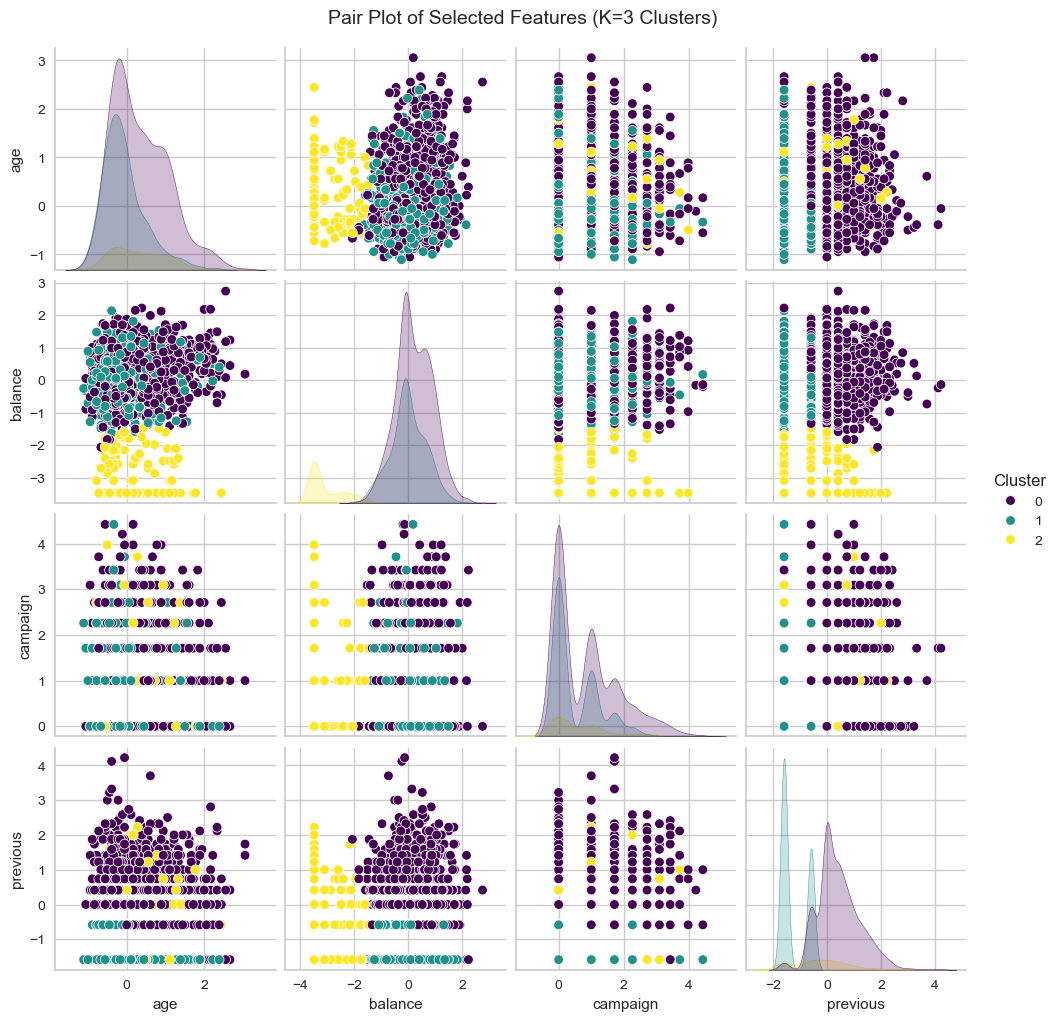

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Visualize the Clusters
# Select specific features for the pair plot
selected_features = ['age', 'balance', 'campaign', 'previous']

# Create the pair plot with cluster labels
g = sns.pairplot(df[selected_features + ['Cluster']], hue='Cluster', palette='viridis')

# Add title with the number of clusters
num_clusters = df['Cluster'].nunique()  # Count unique clusters
plt.suptitle(f'Pair Plot of Selected Features (K={num_clusters} Clusters)', y=1.02, fontsize=14)

plt.show()

### Pair Plot Interpretation (K=3 Clusters)

- **Cluster Separation**: Clusters are differentiated by color. Clusters 0, 1, and 2 show varying degrees of overlap, with Cluster 2 being more distinct.
- **Feature Relationships**:
  - **`age` vs. `balance`**: Higher `age` correlates with higher `balance` for Cluster 2.
  - **`campaign` vs. `previous`**: Clusters 0 and 1 are concentrated in lower ranges, while Cluster 2 shows more variability.
- **Cluster Characteristics**:
  - **Cluster 0**: Low `age`, `balance`, `campaign`, and `previous`.
  - **Cluster 1**: Slightly higher `balance` and `previous` than Cluster 0.
  - **Cluster 2**: Higher `age` and `balance`, representing older, high-balance individuals.
- **Outliers**: Some outliers are visible, particularly in `balance` vs. `campaign`.

**Insights**: Cluster 2 represents older, high-balance individuals, while Clusters 0 and 1 represent younger, low-balance individuals. Overlap between Clusters 0 and 1 suggests similar characteristics.

In [123]:
# Display the first few rows of the dataset with cluster labels
df.head()

,age,education,default,balance,housing,loan,campaign,previous,job_blue-collar,job_entrepreneur,...,job_student,job_technician,job_unemployed,job_nan,marital_married,marital_single,marital_nan,contact_telephone,contact_nan,Cluster
0,-0.333333,3,0,-0.186721,1,0,1.0,0.000000,0,0,...,0,1,0,0,0,1,0,0,0,1
1,0.055556,2,0,0.121845,1,1,1.0,-0.584963,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1.166667,2,0,0.346018,1,1,1.0,-0.584963,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.500000,2,0,-0.178394,1,1,0.0,0.000000,1,0,...,0,0,0,0,1,0,0,0,0,1
4,0.888889,2,0,0.329321,1,0,0.0,-0.584963,0,0,...,0,0,0,0,1,0,0,0,0,1


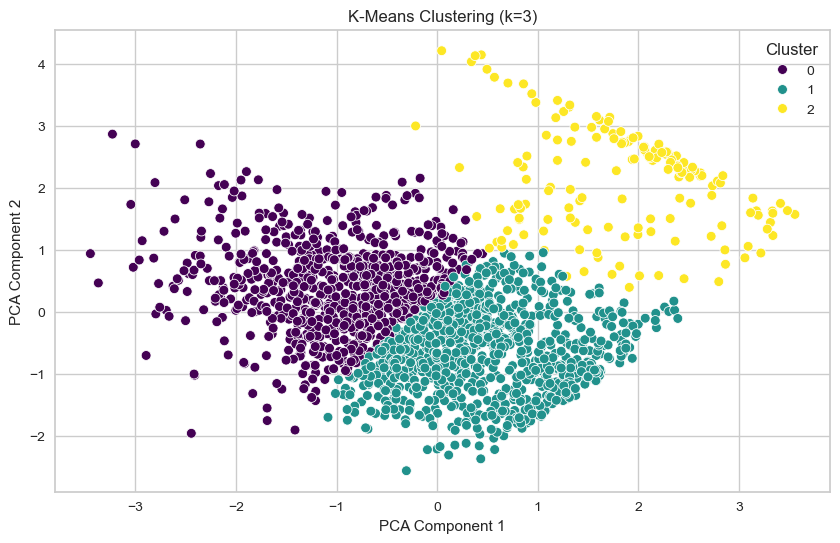

In [125]:
from sklearn.decomposition import PCA
# Reduce the dataset to 2D using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop('Cluster', axis=1))

# Add PCA components to the dataframe for visualization
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=50)
plt.title('K-Means Clustering (k=3)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

### K-Means Clustering Interpretation (k=3)

- **Cluster Separation**: The graph shows the data points projected onto the first two principal components (PCA Component 1 and PCA Component 2). The clusters are differentiated by color:
  - **Cluster 0**: Blue points.
  - **Cluster 1**: Orange points.
  - **Cluster 2**: Green points.
  
  Clusters 0 and 1 show some overlap, while Cluster 2 is more distinct and separated.

- **PCA Components**:
  - **PCA Component 1**: Represents the primary direction of variance in the data. Points spread along this axis indicate significant differences in the underlying features.
  - **PCA Component 2**: Represents the secondary direction of variance. Points spread along this axis show additional variability in the data.

- **Cluster Characteristics**:
  - **Cluster 0**: Concentrated in the lower-left quadrant (negative PCA Component 1 and PCA Component 2), suggesting lower values in the original feature space.
  - **Cluster 1**: Spread across the middle of the graph, indicating moderate values in the original feature space.
  - **Cluster 2**: Located in the upper-right quadrant (positive PCA Component 1 and PCA Component 2), suggesting higher values in the original feature space.

- **Outliers**: A few points lie outside the main cluster groupings, particularly in Cluster 2, indicating potential outliers or unique cases.

**Insights**:
- Cluster 2 represents a distinct group with higher values in the original feature space, while Clusters 0 and 1 represent groups with lower to moderate values.
- The overlap between Clusters 0 and 1 suggests that these groups share similar characteristics in the reduced PCA space.
- The separation of Cluster 2 highlights its uniqueness compared to the other clusters.

<h2 style="color: green;">4-Apply a manifold-learning technique to project the data set to a 2D space </h2>

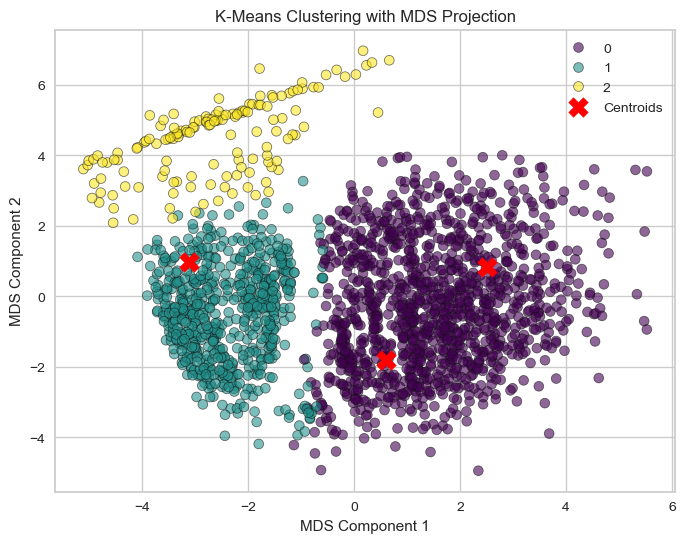

In [60]:
# Apply MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)  # Project the data
centroids_mds = mds.fit_transform(kmeans.cluster_centers_)  # Project cluster centers

# Visualize MDS Projection
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_mds[:, 0], y=X_mds[:, 1], hue=df['Cluster'], palette='viridis', alpha=0.6, edgecolor='k')
plt.scatter(centroids_mds[:, 0], centroids_mds[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.title('K-Means Clustering with MDS Projection')
plt.legend()
plt.show()

## 📌 Interpretation of K-Means Clustering with MDS Projection

- The **MDS (Multi-Dimensional Scaling) projection** reduces the high-dimensional data into a **2D space** for visualization.
- The dataset is grouped into **three clusters (0, 1, and 2)**, each represented by different colors.
- **Cluster centroids** are marked with **red "X" symbols**, showing the central points of each group.
- The clusters are **well-separated**, suggesting a meaningful grouping:
  - **Cluster 0 (purple)**: The largest, compact group.
  - **Cluster 1 (yellow)**: More spread-out, possibly an outlier-prone cluster.
  - **Cluster 2 (green)**: Well-defined, but slightly overlapping with Cluster 0.
- The **separation between clusters** indicates that the K-Means algorithm has identified distinct patterns in the data.

📊 **Conclusion:**  
The visualization suggests that K-Means has successfully identified different groups, though **some overlap exists** between clusters. If better separation is needed, **other clustering methods** (e.g., DBSCAN) or **feature selection techniques** could be explored.


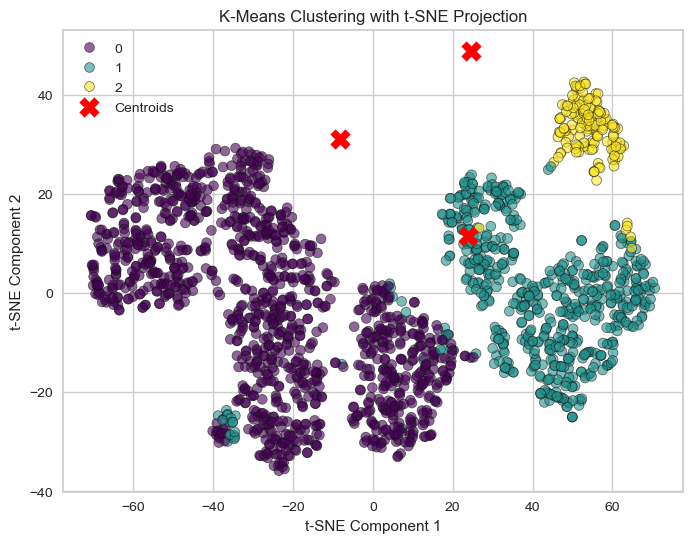

In [67]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)  
X_tsne = tsne.fit_transform(X_scaled)  # Project the data

tsne_centroids = TSNE(n_components=2, random_state=42, perplexity=2)
centroids_tsne = tsne_centroids.fit_transform(kmeans.cluster_centers_) # Project cluster centers

# Visualize t-SNE Projection
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['Cluster'], palette='viridis', alpha=0.6, edgecolor='k')
plt.scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('K-Means Clustering with t-SNE Projection')
plt.legend()
plt.show()


## Interpretation of t-SNE Clustering Visualization

- The plot represents **K-Means clustering results** projected using **t-SNE** into a 2D space.
- Each **color** represents a different cluster (**Cluster 0, 1, 2**).
- **Centroids (red X markers)** indicate the cluster centers.
- The clusters appear **well-separated**, indicating that K-Means was effective.
- **Cluster 0 (purple)** is widely spread, while **Cluster 2 (yellow)** is more compact.
- The centroids seem **far from some dense areas**, suggesting possible refinement in clustering.

### 📌 Conclusion:
t-SNE effectively highlights the **non-linear structure** of the data, showing distinct groupings. However, the centroid positions suggest that K-Means might not fully capture the true cluster shapes.


<h2 style="color: green;">5-Cluster Analysis</h2>

In [127]:
# ✅ 1. Analyze Cluster Characteristics
# Group data by clusters and compute mean for each feature
cluster_characteristics = df.groupby("Cluster").mean()
print(cluster_characteristics)


              age  education   default   balance   housing      loan  \
Cluster                                                                
0        0.369809   2.248737  0.003788  0.234889  0.422980  0.116162   
1        0.075061   2.226451  0.008563  0.091614  0.517602  0.131304   
2        0.284855   2.203822  0.019108 -2.900822  0.535032  0.127389   

         campaign  previous  job_blue-collar  job_entrepreneur  ...  \
Cluster                                                         ...   
0        1.134809  0.754815         0.147727          0.020202  ...   
1        0.428377 -0.816786         0.145576          0.023787  ...   
2        0.662803 -0.252092         0.178344          0.025478  ...   

         job_technician  job_unemployed   job_nan  marital_married  \
Cluster                                                              
0              0.159091        0.034091  0.003788         0.661616   
1              0.182683        0.034253  0.006660         0.463368   
2  

## 📊 Cluster Analysis Interpretation

- **Cluster 0**: Moderate balance, fewer loans, and stable job distribution.
- **Cluster 1**: Higher unknown contact methods, more single individuals, and slightly higher default rate.
- **Cluster 2**: Negative balance, higher loan dependency, and distinct job distribution.

### 🔑 Key Insights:
- Cluster 0 represents a financially stable group.
- Cluster 1 has more variance in financial status.
- Cluster 2 appears to be struggling financially.

These insights can help in targeted marketing and risk analysis. 🚀


C:\Users\dell\AppData\Local\Temp\ipykernel_14792\1855605467.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')
C:\Users\dell\AppData\Local\Temp\ipykernel_14792\1855605467.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')
C:\Users\dell\AppData\Local\Temp\ipykernel_14792\1855605467.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')
C:\Users\dell\AppData\Local\Temp\ipykernel_14792\185560

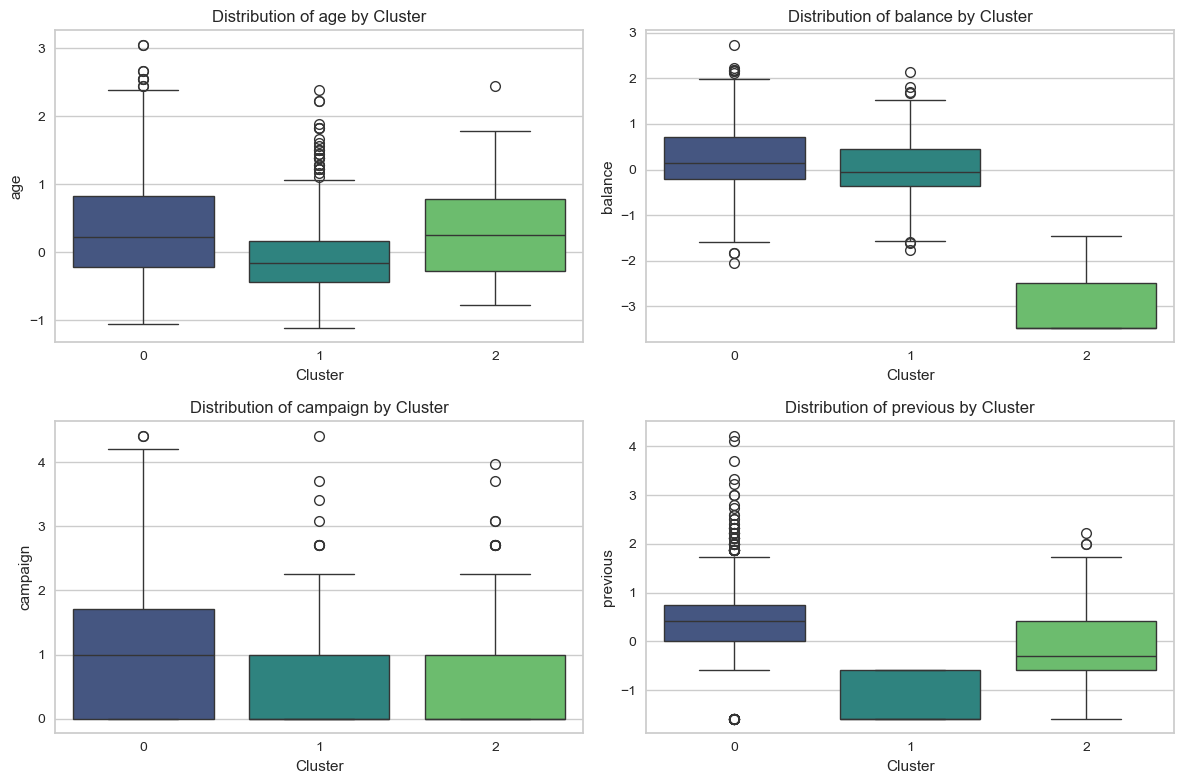

In [78]:
# Select relevant features for visualization
features = ['age', 'balance', 'campaign', 'previous']

# Plot boxplots for each feature grouped by clusters
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')
    plt.title(f'Distribution of {feature} by Cluster')

plt.tight_layout()
plt.show()

## 📊 Cluster-wise Feature Distribution Analysis

### 🔹 Age Distribution:
- Cluster 0 has a wider age range with some outliers.
- Cluster 1 is more concentrated around lower values.
- Cluster 2 has a broader distribution with higher values.

### 🔹 Balance Distribution:
- Cluster 0 and Cluster 1 have similar balance distributions.
- Cluster 2 has significantly lower balances, indicating financial struggles.

### 🔹 Campaign Distribution:
- Cluster 0 has higher campaign values, meaning more marketing attempts.
- Clusters 1 and 2 have fewer campaigns, showing less engagement.

### 🔹 Previous Contacts:
- Cluster 0 has the most variation in past contacts.
- Cluster 2 has relatively higher past interactions.
- Cluster 1 has the least previous interactions.

🔍 **Key Insight:** Cluster 2 appears financially weaker with lower balances but has more past interactions. Cluster 0 is more engaged in marketing campaigns.


In [81]:
#✅ 2. Evaluate Clustering Performance
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, df['Cluster'])
print(f'Silhouette Score: {score:.4f}')

Silhouette Score: 0.2732


## ✅ 2. Evaluating Clustering Performance

### 📏 **Silhouette Score Interpretation:**
- The **Silhouette Score** measures how well clusters are separated and how similar points are within the same cluster.
- A score of **0.2732** suggests that the clustering has **some structure**, but the clusters are **not well-separated**.
- Generally:
  - **Closer to 1** → Well-separated clusters
  - **Around 0** → Overlapping clusters
  - **Below 0** → Poor clustering

### 🔍 **Key Insight:**
- The clustering is **moderate**, meaning there is **some separation**, but there may be **overlapping data points**.
- Possible improvements:
  - Try different clustering algorithms (e.g., DBSCAN, Agglomerative).
  - Tune the number of clusters.
  - Use feature selection or transformation (e.g., PCA).


In [129]:
# ✅ 3. Compare with Target Variable

# Read original data
original_df = pd.read_csv("bank.csv")

# Ensure both dataframes have the same number of rows
df = df.reset_index(drop=True)
original_df = original_df.reset_index(drop=True)

# Merge clusters with the original target variable
merged_df = df.merge(original_df[['subscribed']], left_index=True, right_index=True)

# Compare clusters with the target variable
print(pd.crosstab(merged_df['Cluster'], merged_df['subscribed']))



subscribed   no  yes
Cluster             
0           357  435
1           552  499
2            91   66


### 📊 Comparing Clusters with Target Variable  

The table below shows the distribution of the **subscribed** variable (yes/no) across the three clusters:  

| Cluster | No  | Yes |
|---------|-----|-----|
| 0       | 357 | 435 |
| 1       | 552 | 499 |
| 2       | 91  | 66  |

#### 🔍 **Observations:**  
- **Cluster 0** has a relatively balanced distribution between subscribers (435) and non-subscribers (357).  
- **Cluster 1** has the highest number of non-subscribers (552), but also a high number of subscribers (499).  
- **Cluster 2** is the smallest group, with fewer data points, but the proportion of non-subscribers (91) is still higher than subscribers (66).  

These insights suggest that different clusters may have different likelihoods of subscription, which can help in targeting potential customers.  


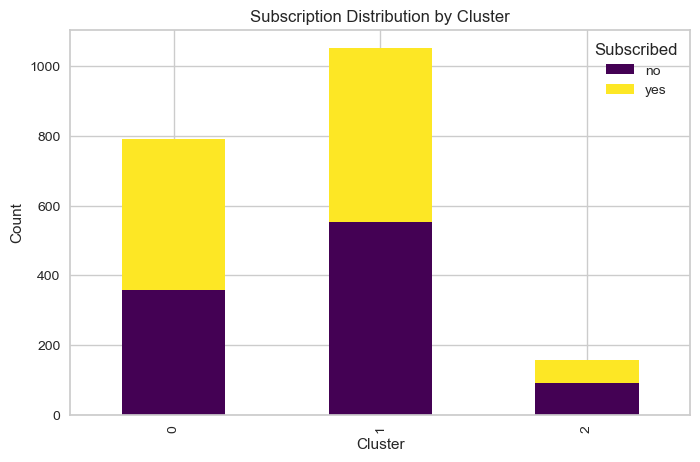

In [134]:


# Crosstab results
crosstab_result = pd.crosstab(merged_df['Cluster'], merged_df['subscribed'])

# Plot
crosstab_result.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8,5))

# Labels and Title
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Subscription Distribution by Cluster")
plt.legend(title="Subscribed")

# Show Plot
plt.show()


In [131]:
print(len(df)) 
print(df.columns)


print(len(original_df))
print(original_df.columns)

2000
Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'campaign',
       'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_nan',
       'marital_married', 'marital_single', 'marital_nan', 'contact_telephone',
       'contact_nan', 'Cluster', 'PCA1', 'PCA2'],
      dtype='object')
2000
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')
